In [2]:
from tensorflow.examples.tutorials.mnist import input_data
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import train_test_split
from numpy import savetxt
import pandas as pd
from numpy import loadtxt

In [4]:
mnist = input_data.read_data_sets("MNIST_data/")
X_m = mnist.train.images
y = mnist.train.labels

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [5]:
N = len(X_m)
index = np.array([])

for i in range (N):
    if y[i] != 1 and y[i] != 0:
        index = np.append(index, np.array([int(i)]), axis=0)
    i += 1
    
X_m_binary = np.delete(X_m, index, axis=0)
y_binary = np.delete(y, index, axis=0)

c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:9: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  if __name__ == '__main__':
c:\users\user\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:10: DeprecationWarning: using a non-integer array as obj in delete will result in an error in the future
  # Remove the CWD from sys.path while we load stuff.


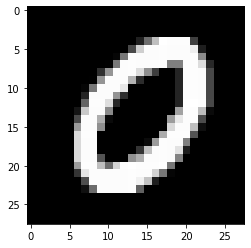

In [7]:
first_image = X_m_binary[5]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [8]:
pca = PCA(n_components=2, whiten = False, random_state = 2020)

In [9]:
X_pca_binary = pca.fit_transform(X_m_binary)

In [10]:
X_pca_binary.shape

(11623, 2)

In [11]:
y_binary.shape

(11623,)

In [12]:
X_pca_reconst = pca.inverse_transform(X_pca_binary)
X_pca_reconst.shape

(11623, 784)

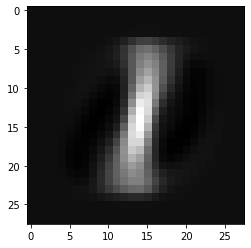

In [15]:
first_image = X_pca_reconst[0]
first_image = np.array(first_image, dtype='float')
pixels = first_image.reshape((28, 28))
plt.imshow(pixels, cmap='gray')
plt.show()

In [16]:
# make all entries become positive value

xmax = X_pca_binary.max()
xmin = X_pca_binary.min()

for i in range (len(X_pca_binary)):
    for j in range (len(X_pca_binary[0,:])):
        X_pca_binary[i,j] = X_pca_binary[i,j] - xmin

In [17]:
X_pca_binary.max()

13.610371

In [18]:
# separete between label 0 and 1

X_0 = X_pca_binary[y_binary==0, :]
X_1 = X_pca_binary[y_binary==1, :]
y_0 = y_binary[y_binary==0]
y_1 = y_binary[y_binary==1]

# take the first 150 data
X_0 = X_0[:150, :]
X_1 = X_1[:150, :]
y_0 = y_0[:150]
y_1 = y_1[:150]

X_pca_binary = np.append(X_0, X_1, axis=0)
y_binary = np.append(y_0, y_1, axis=0)

In [19]:
X_pca_binary.shape

(300, 2)

In [20]:
y_binary.shape

(300,)

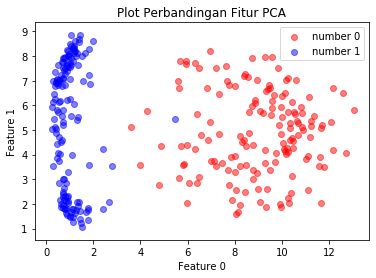

In [21]:
f1 = 0
f2 = 1

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

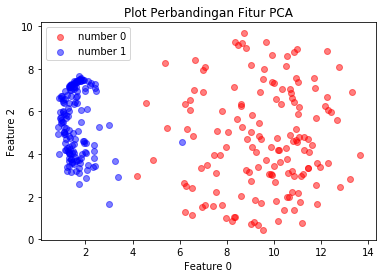

In [19]:
f1 = 0
f2 = 2

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

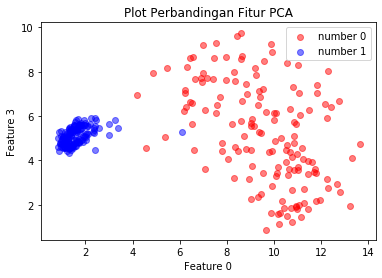

In [20]:
f1 = 0
f2 = 3

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

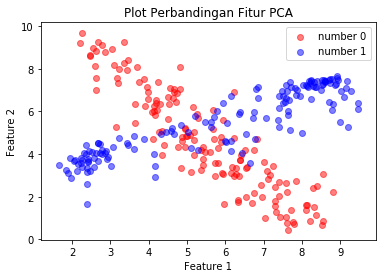

In [21]:
f1 = 1
f2 = 2

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

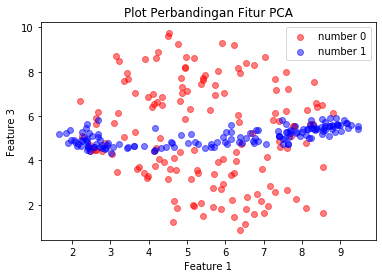

In [22]:
f1 = 1
f2 = 3

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

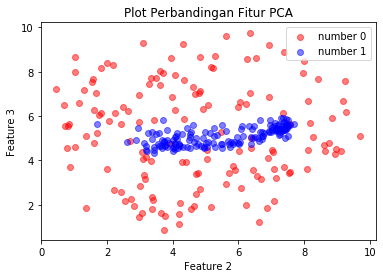

In [23]:
f1 = 2
f2 = 3

plt.scatter(X_pca_binary[y_binary==0, f1], X_pca_binary[y_binary==0, f2], color='red', alpha=0.5,label='number 0')
plt.scatter(X_pca_binary[y_binary==1, f1], X_pca_binary[y_binary==1, f2], color='blue', alpha=0.5,label='number 1')
plt.legend()
plt.title("Plot Perbandingan Fitur PCA")
plt.ylabel('Feature ' + str(f2))
plt.xlabel('Feature ' + str(f1))
plt.show()

In [22]:
# splitting train-test dataset
# train + val = 75%, test = 25%
# train = 50% = 0.66(train+val), val = 25% = 0.33(train+val)

X_0_train_val, X_0_test, y_0_train_val, y_0_test = train_test_split(X_0, y_0, test_size=0.25, random_state=42)
X_1_train_val, X_1_test, y_1_train_val, y_1_test = train_test_split(X_1, y_1, test_size=0.25, random_state=42)

X_0_train, X_0_val, y_0_train, y_0_val = train_test_split(X_0_train_val, y_0_train_val, test_size=0.33333, random_state=42)
X_1_train, X_1_val, y_1_train, y_1_val = train_test_split(X_1_train_val, y_1_train_val, test_size=0.33333, random_state=42)

In [23]:
len(X_0_train) + len(X_0_val) + len(X_0_test)

150

In [24]:
len(X_1_train) + len(X_1_val) + len(X_1_test)

150

In [25]:
len(y_0_train) + len(y_0_val) + len(y_0_test)

150

In [26]:
len(y_1_train) + len(y_1_val) + len(y_1_test)

150

In [27]:
# combine label 0 and 1 into 1 dataset
X_train = np.append(X_0_train, X_1_train, axis=0)
y_train = np.append(y_0_train, y_1_train, axis=0)

X_val = np.append(X_0_val, X_1_val, axis=0)
y_val = np.append(y_0_val, y_1_val, axis=0)

X_test = np.append(X_0_test, X_1_test, axis=0)
y_test = np.append(y_0_test, y_1_test, axis=0)

In [28]:
len(X_train) + len(X_val) + len(X_test)

300

In [29]:
len(y_train) + len(y_val) + len(y_test)

300

In [30]:
X_train.shape

(148, 2)

In [31]:
savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/X_train.csv', X_train, delimiter=',')
savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/y_train.csv', y_train, delimiter=',')

savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/X_val.csv', X_val, delimiter=',')
savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/y_val.csv', y_val, delimiter=',')

savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/X_test.csv', X_test, delimiter=',')
savetxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/y_test.csv', y_test, delimiter=',')

In [32]:
pd.DataFrame(X_train)

,0,1
0,8.720873,7.918496
1,9.314304,6.566535
2,10.478561,4.552479
3,10.647442,5.350280
4,6.321054,4.233317
...,...,...
143,0.478986,3.846075
144,0.902580,7.705974
145,0.700471,5.826605
146,0.791902,7.286974


In [33]:
data = loadtxt('C:/Users/user/Jupyter Notebook Project/Tugas Akhir/X_train.csv', delimiter=',')
pd.DataFrame(data)

,0,1
0,8.720873,7.918496
1,9.314304,6.566535
2,10.478561,4.552479
3,10.647442,5.350280
4,6.321054,4.233317
...,...,...
143,0.478986,3.846075
144,0.902580,7.705974
145,0.700471,5.826605
146,0.791902,7.286974
